In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/My Drive/ForestFire/MODIS_Point/Final/itog/data_ndvi.csv')
data.head()

,longitude,latitude,fire,LandClass,Road_DIST,Railway_DIST,id_city,City_DIST,NDVI,POPYLATION
0,103.0033,51.2707,1,4,8675.822202,61693.95289,696,22178.10124,0.838593,752
1,111.8970,53.8887,1,4,21652.928370,224193.47740,22,38364.78625,0.619637,127
2,114.0316,53.8400,1,4,4040.936371,199433.67870,142,37835.03355,0.764099,242
3,102.8222,51.3524,1,4,22963.922060,66492.50026,696,18490.81931,0.811458,752
4,111.9286,53.8974,1,4,21582.689350,224232.91060,22,36459.48870,0.572542,127


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9764 entries, 0 to 9763
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitude     9764 non-null   float64
 1   latitude      9764 non-null   float64
 2   fire          9764 non-null   int64  
 3   LandClass     9764 non-null   int64  
 4   Road_DIST     9764 non-null   float64
 5   Railway_DIST  9764 non-null   float64
 6   id_city       9764 non-null   int64  
 7   City_DIST     9764 non-null   float64
 8   NDVI          9764 non-null   float64
 9   POPYLATION    9764 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 762.9 KB


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


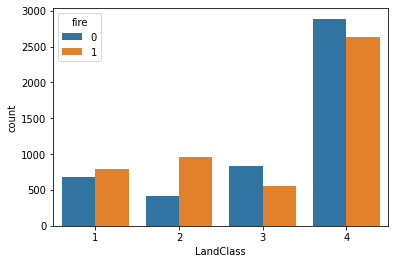

In [ ]:
sns.countplot(data=data,x='LandClass',hue='fire')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# **RandomForestClassifier**

In [ ]:
X=data[['LandClass','Road_DIST','Railway_DIST','City_DIST','NDVI','POPYLATION']]
Y=data['fire'].astype(int)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)

Best accuracy on CV is 76.19% with 94 trees


Text(0.5, 0, 'N_estimators')

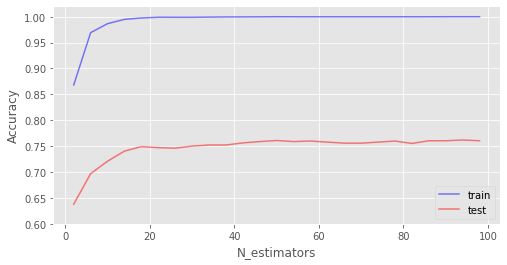

In [ ]:
#Подбор оптимальоного количества деревьев RandomForest
train_acc = []
test_acc = []
trees_grid=range(2,100,4)
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=3)
    rfc.fit(X_train, Y_train)
    train_acc.append(rfc.score(X_train, Y_train))
    test_acc.append(rfc.score(X_test, Y_test))
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc)*100,trees_grid[np.argmax(test_acc)]))
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc, alpha=0.5, color='red', label='test')
ax.legend(loc='best')
ax.set_ylim([0.6,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

Text(0.5, 0, 'N_estimators')

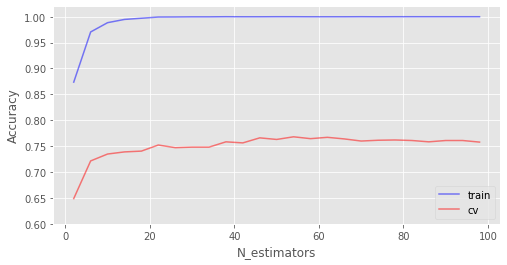

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.6,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

Best accuracy on CV is 76.14% with 22 max_depth


Text(0.5, 0, 'Max_depth')

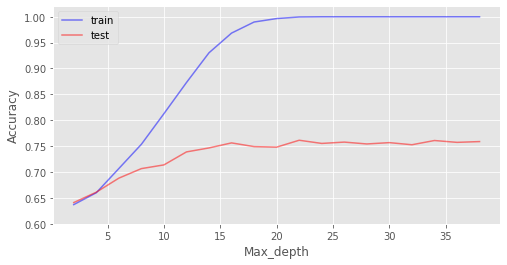

In [ ]:
#Подбор оптимальоной глубины деревьев RandomForest
train_acc = []
test_acc = []
max_depth_grid=range(2,40,2)
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=54,max_depth=max_depth, random_state=3)
    rfc.fit(X_train, Y_train)
    train_acc.append(rfc.score(X_train, Y_train))
    test_acc.append(rfc.score(X_test, Y_test))
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc)*100,max_depth_grid[np.argmax(test_acc)]))
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc, alpha=0.5, color='red', label='test')
ax.legend(loc='best')
ax.set_ylim([0.6,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

In [ ]:
clf = RandomForestClassifier(random_state=3)
parametrs = {'n_estimators':range(50,61,2), 'max_depth':range(5,22,2)}
grid_search_clf=GridSearchCV(clf,parametrs,cv=5)

In [ ]:
clf = RandomForestClassifier(random_state=3)
parametrs = {'n_estimators':range(50,61,2), 'max_depth':range(5,22,2)}
grid_search_clf=GridSearchCV(clf,parametrs,cv=5)
clasif=grid_search_clf.fit(X_train,Y_train)
clasif.best_params_

{'max_depth': 19, 'n_estimators': 50}

In [ ]:
clasif=RandomForestClassifier(n_estimators=50,max_depth=19,random_state=3)
clasif.fit(X_train,Y_train)
Y_pred=clasif.predict(X_test)
clasif.score(X_test,Y_test)

0.7501280081925243

In [ ]:
feature_importance=clasif.feature_importances_
feature_importance_df= pd.DataFrame({'features':list(X_train),'feature_imoprtance':feature_importance})
feature_importance_df.sort_values('feature_imoprtance',ascending=False)

,features,feature_imoprtance
1,Road_DIST,0.210736
2,Railway_DIST,0.210670
3,City_DIST,0.195072
4,NDVI,0.175862
5,POPYLATION,0.169432
0,LandClass,0.038227


In [ ]:
from sklearn import metrics
print('accuracy_score: %.2f' % metrics.accuracy_score(Y_test, Y_pred))
print('precision_score: %.2f' % metrics.accuracy_score(Y_test, Y_pred))
print('recall_score: %.2f' % metrics.recall_score(Y_test, Y_pred))
print('f1_score: %.2f' % metrics.f1_score(Y_test, Y_pred))

accuracy_score: 0.75
precision_score: 0.75
recall_score: 0.79
f1_score: 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


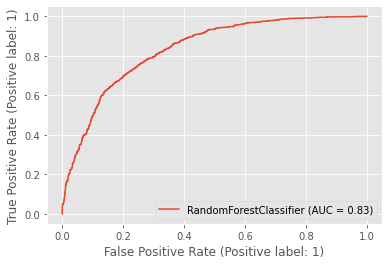

In [ ]:
metrics.plot_roc_curve(clasif, X_test, Y_test) 

# **GradientBoostingClassifier**

Best accuracy on CV is 74.19% with 1000 trees


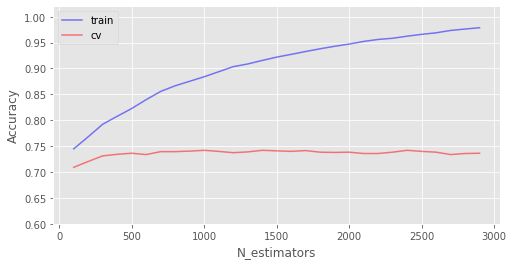

In [ ]:
#Подбор оптимальоного количества деревьев GradientBoostingClassifier
train_acc = []
test_acc = []
trees_grid=range(100,3000,100)
for ntrees in trees_grid:
    gbc = GradientBoostingClassifier(n_estimators=ntrees, random_state=3)
    gbc.fit(X_train, Y_train)
    train_acc.append(gbc.score(X_train, Y_train))
    test_acc.append(gbc.score(X_test, Y_test))
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.6,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc)*100,trees_grid[np.argmax(test_acc)]))

Best accuracy on CV is 77.42% with 20 max_depth


Text(0.5, 0, 'Max_depth')

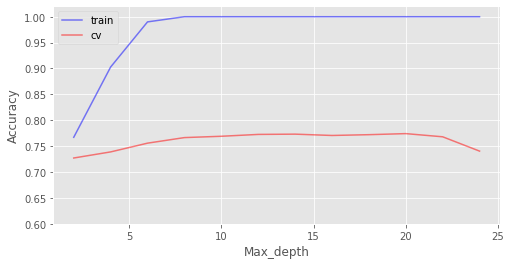

In [ ]:
#Подбор оптимальоной глубины деревьев GradientBoostingClassifier
train_acc = []
test_acc = []
max_depth_grid=range(2,25,2)
for max_depth in max_depth_grid:
    gbc = GradientBoostingClassifier(n_estimators=572,max_depth=max_depth, random_state=3)
    gbc.fit(X_train, Y_train)
    train_acc.append(gbc.score(X_train, Y_train))
    test_acc.append(gbc.score(X_test, Y_test))
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc)*100,max_depth_grid[np.argmax(test_acc)]))
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.6,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth")

Best accuracy on CV is 74.35% with 0.20000000000000004 Learning_rate


Text(0.5, 0, 'Learning_rate')

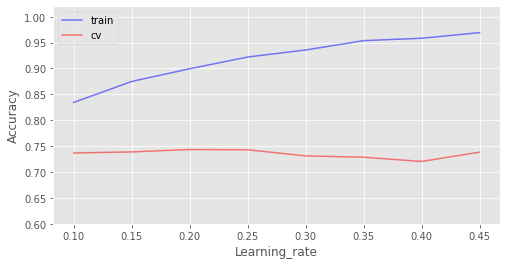

In [ ]:
train_acc = []
test_acc = []
Learning_rate_grid=np.arange(0.1,0.5,0.05)
for Learning_rate in Learning_rate_grid:
    gbc = GradientBoostingClassifier(learning_rate=Learning_rate,n_estimators=572, random_state=3)
    gbc.fit(X_train, Y_train)
    train_acc.append(gbc.score(X_train, Y_train))
    test_acc.append(gbc.score(X_test, Y_test))
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} Learning_rate".format(max(test_acc)*100,Learning_rate_grid[np.argmax(test_acc)]))
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(Learning_rate_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(Learning_rate_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.6,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Learning_rate")

In [ ]:
boostclf = GradientBoostingClassifier(random_state=3)
parametrs = {'learning_rate':np.arange(0.18,0.22,0.1),'n_estimators':range(570,600,10), 'max_depth':range(6,9,2)}
boost_grid_search_clf=GridSearchCV(boostclf,parametrs,cv=5)

In [ ]:
boostclasif=boost_grid_search_clf.fit(X_train,Y_train)
boostclasif.best_params_

{'learning_rate': 0.18, 'max_depth': 8, 'n_estimators': 570}

In [ ]:
bostclas=GradientBoostingClassifier(learning_rate=0.18,n_estimators=570,max_depth=15,random_state=3).fit(X_train,Y_train)
Y_pred=bostclas.predict(X_test)
bostclas.score(X_test,Y_test)

0.783410138248848

In [ ]:
feature_importance=bostclas.feature_importances_
feature_importance_df= pd.DataFrame({'features':list(X_train),'feature_imoprtance':feature_importance})
feature_importance_df.sort_values('feature_imoprtance',ascending=False)

,features,feature_imoprtance
2,Railway_DIST,0.226929
1,Road_DIST,0.217503
3,City_DIST,0.186422
5,POPYLATION,0.182422
4,NDVI,0.153443
0,LandClass,0.033280


In [ ]:
from sklearn import metrics
print('accuracy_score: %.2f' % metrics.accuracy_score(Y_test, Y_pred))
print('precision_score: %.2f' % metrics.accuracy_score(Y_test, Y_pred))
print('recall_score: %.2f' % metrics.recall_score(Y_test, Y_pred))
print('f1_score: %.2f' % metrics.f1_score(Y_test, Y_pred))

accuracy_score: 0.78
precision_score: 0.78
recall_score: 0.82
f1_score: 0.79


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


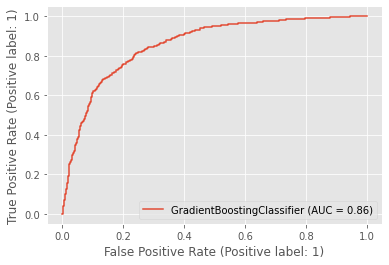

In [ ]:
metrics.plot_roc_curve(bostclas, X_test, Y_test) 

In [ ]:
print('fire=',bostclas.predict(pd.DataFrame({'LandClass':4,
                                     'Road_DIST':5000.0,
                                     'Railway_DIST':104.0,
                                     'City_DIST':3500.0,
                                     'NDVI':0.8,
                                     'POPYLATION':60000.0,},index=[0])))

fire= [0]
